#### Importing packages

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt
import random

#### get benign scores

In [2]:
ben_score1 = []
f = open('21_cs_ben100_file.txt','r')

for line in f:
    ben_score1.append(line.strip())
len(ben_score1)

1199

In [3]:
ben_score1 = [float(i) for i in ben_score1] 

In [4]:
#ben_score

Text(0, 0.5, 'Density')

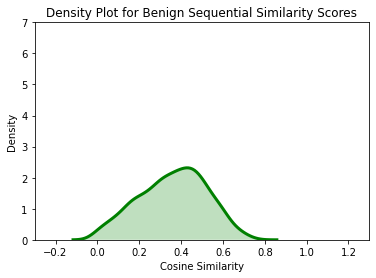

In [4]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(ben_score1, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.3, 1.3),ylim=(0, 7))
plt.title('Density Plot for Benign Sequential Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')

#### get benign 2 scores

In [7]:
txt_score = []
f = open('22_cs_ben_shuf_file.txt','r')

for line in f:
    txt_score.append(line.strip())
len(txt_score)

1199

In [8]:
txt_score = [float(i) for i in txt_score] 

Text(0, 0.5, 'Density')

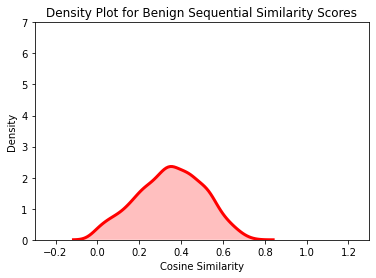

In [10]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(txt_score, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.3, 1.3),ylim=(0, 7))
plt.title('Density Plot for Benign Sequential Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')

In [7]:
#random.shuffle(txt_score)

#### look at minimum scores in both lists

In [11]:
min(ben_score1)

0.0

In [12]:
min(txt_score)

0.0

### <font color='red'>__SKIP FROM HERE__</font>
#### need to remove zeroes

In [13]:
count = 0
for i in txt_score:
    if i == 0:
        count+=1

In [14]:
count

18

In [15]:
count = 0
for i in ben_score1:
    if i == 0:
        count+=1

In [16]:
count

16

In [17]:
ben_score = []
for i in range(len(ben_score1)-1):
    if ben_score1[i] != 0:
        ben_score.append(ben_score1[i])

In [18]:
text_score = []
for i in range(len(txt_score)-1):
    if txt_score[i] != 0:
        text_score.append(txt_score[i])

In [19]:
min(text_score)

0.004567210044745518

In [20]:
min(ben_score)

0.015073854388204484

#### check length of both lists now

In [21]:
len(text_score)

1180

In [22]:
len(ben_score)

1182

#### need to make both lists equal

In [23]:
def make_equal(list1, list2):
    if (len(list1) > len(list2)):
        for i in range(len(list1)-len(list2)+1):
            if i != 0:
                list1.pop(len(list1)-1)
    elif (len(list2) > len(list1)):
        for i in range(len(list2)-len(list1)+1):
            if i != 0:
                list2.pop(len(list2)-1)

In [24]:
make_equal(ben_score,text_score)

In [25]:
len(ben_score)

1180

In [26]:
len(text_score)

1180

### <font color='red'>__SKIP UPTO HERE__</font>

### Plot both distributions

Text(0, 0.5, 'Density')

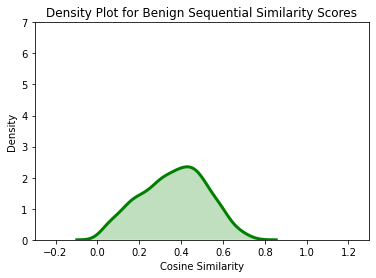

In [27]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(ben_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.3, 1.3),ylim=(0, 7))
plt.title('Density Plot for Benign Sequential Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')

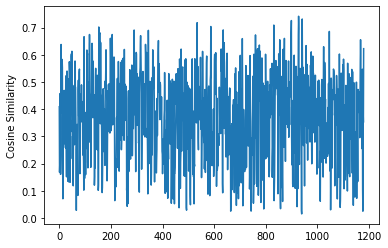

In [28]:
plt.plot(ben_score)
plt.ylabel("Cosine Similarity")
plt.show()

Text(0, 0.5, 'Density')

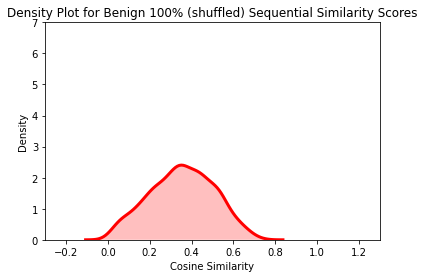

In [29]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(text_score, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.3, 1.3),ylim=(0, 7))
plt.title('Density Plot for Benign 100% (shuffled) Sequential Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')

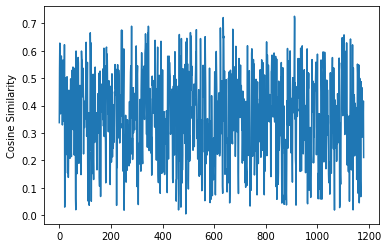

In [30]:
plt.plot(text_score)
plt.ylabel("Cosine Similarity")
plt.show()

### Divergence 
<br>
There are many situations where we may want to compare two probability distributions.
<br> <br>
Specifically, we may have a single random variable and two different probability distributions for the variable, such as a true distribution and an approximation of that distribution.
<br> <br>
In situations like this, it can be useful to quantify the difference between the distributions. Generally, this is referred to as the problem of calculating the statistical distance between two statistical objects, e.g. probability distributions.
<br> <br>
One approach is to calculate a distance measure between the two distributions. This can be challenging as it can be difficult to interpret the measure.
<br> <br>
Instead, it is more common to calculate a divergence between two probability distributions. A divergence is like a measure but is not symmetrical. This means that a divergence is a scoring of how one distribution differs from another, where calculating the divergence for distributions P and Q would give a different score from Q and P.

### Kullback Leibler

__Calculations__ <br> <br>
The Kullback-Leibler Divergence score, or KL divergence score, quantifies how much one probability distribution differs from another probability distribution.
<br> <br>
The KL divergence between two distributions Q and P is often stated using the following notation:
<br> <br>
KL(P || Q)
Where the “||” operator indicates “divergence” or Ps divergence from Q.
<br> <br>
KL divergence can be calculated as the negative sum of probability of each event in P multiplied by the log of the probability of the event in Q over the probability of the event in P.
<br> <br>
KL(P || Q) = – sum x in X P(x) * log(Q(x) / P(x))
The value within the sum is the divergence for a given event
<br> <br>
This is the same as the positive sum of probability of each event in P multiplied by the log of the probability of the event in P over the probability of the event in Q (e.g. the terms in the fraction are flipped). This is the more common implementation used in practice.
<br> <br>
KL(P || Q) = sum x in X P(x) * log(P(x) / Q(x))
<br> <br>
__Intuition__ <br> <br>
The intuition for the KL divergence score is that when the probability for an event from P is large, but the probability for the same event in Q is small, there is a large divergence. When the probability from P is small and the probability from Q is large, there is also a large divergence, but not as large as the first case.
<br> <br>
__When the score is 0, it suggests that both distributions are identical, otherwise the score is positive.__
<br> <br>
Importantly, the KL divergence score is not symmetrical, for example:
<br> <br>
KL(P || Q) != KL(Q || P)

__METHOD 1__ <br>

<font color='red'>__in nats (log e)__</font>

In [31]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr
# define distributions
#p = [0.10, 0.40, 0.50]
#q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = rel_entr(text_score, ben_score)
print('KL(Ben_Shuf_Score || Ben_Score): %.3f nats' % sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(ben_score, text_score)
print('KL(Ben_Score || Ben_Shuf_Score): %.3f nats' % sum(kl_qp))

KL(Ben_Shuf_Score || Ben_Score): 84.862 nats
KL(Ben_Score || Ben_Shuf_Score): 120.242 nats


__METHOD 2__

<font color='red'>__in bits (log 2)__</font>

In [32]:
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [33]:
from math import log2

In [34]:
# calculate (ben_score || text_score)
kl_pq = kl_divergence(text_score, ben_score)
print('KL(ben_shuf_Score || Ben_Score): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(ben_score, text_score)
print('KL(Ben_Score || ben_shuf_Score): %.3f bits' % kl_qp)

KL(ben_shuf_Score || Ben_Score): 122.430 bits
KL(Ben_Score || ben_shuf_Score): 173.473 bits


#### <font color='red'>Divergence of Benign Texts with itself</font>

In [35]:
# calculate (ben_score || text_score)
kl_pq = kl_divergence(ben_score, ben_score)
print('KL(Ben_Score || Ben_Score): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(ben_score, ben_score)
print('KL(Ben_Score || Ben_Score): %.3f bits' % kl_qp)

KL(Ben_Score || Ben_Score): 0.000 bits
KL(Ben_Score || Ben_Score): 0.000 bits


### Jensen-Shannon Divergence
__Calculations__ <br> <br>
The Jensen-Shannon divergence, or JS divergence for short, is another way to quantify the difference (or similarity) between two probability distributions.
<br> <br>
It uses the KL divergence to calculate a normalized score that is symmetrical. This means that the divergence of P from Q is the same as Q from P, or stated formally:
<br> <br>
JS(P || Q) == JS(Q || P)
The JS divergence can be calculated as follows:
<br> <br>
JS(P || Q) = 1/2 * KL(P || M) + 1/2 * KL(Q || M)
Where M is calculated as:
<br> <br>
M = 1/2 * (P + Q)
And KL() is calculated as the KL divergence described in the previous section.
<br> <br>
It is more useful as a measure as it provides a smoothed and normalized version of KL divergence, with scores between 0 (identical) and 1 (maximally different), when using the base-2 logarithm.
<br> <br>
The square root of the score gives a quantity referred to as the Jensen-Shannon distance, or JS distance for short.

__METHOD 1__

In [36]:
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [37]:
import math

In [38]:
# calculate JS(P || Q)
js_pq = js_divergence(np.asarray(ben_score), np.asarray(text_score))
print('JS(ben_texts || ben_shuf_texts) divergence: %.3f bits' % js_pq)
print('JS(ben_texts || ben_shuf_texts) distance: %.3f' % math.sqrt(js_pq))

JS(ben_texts || ben_shuf_texts) divergence: 33.502 bits
JS(ben_texts || ben_shuf_texts) distance: 5.788


In [39]:
# calculate JS(Q || P)
js_qp = js_divergence(np.asarray(ben_score), np.asarray(text_score))
print('JS(ben_shuf_texts || ben_texts) divergence: %.3f bits' % js_qp)
print('JS(ben_shuf_texts || ben_texts) distance: %.3f' % math.sqrt(js_qp))

JS(ben_shuf_texts || ben_texts) divergence: 33.502 bits
JS(ben_shuf_texts || ben_texts) distance: 5.788


In [40]:
# calculate JS(Q || P)
js_qp = js_divergence(np.asarray(ben_score), np.asarray(ben_score))
print('JS(ben_texts || ben_texts) divergence: %.3f bits' % js_qp)
print('JS(ben_texts || ben_texts) distance: %.3f' % math.sqrt(js_qp))

JS(ben_texts || ben_texts) divergence: 0.000 bits
JS(ben_texts || ben_texts) distance: 0.000
